(how-to:data:visualise-provenance)=

# How to visualize provenance

```{note}
This tutorial can be downloaded and run as a Jupyter Notebook: {nb-download}`visualising_graphs.ipynb` {octicon}`download`
```

The provenance graph of a database can be visually inspected, *via* [graphviz](https://www.graphviz.org/), using both the python API and command-line interface.

```{seealso}
`verdi graph generate -h`
```

We first load a profile, containing the provenance graph (in this case we load an archive as the profile).

In [1]:
from aiida import load_profile
from aiida.common import LinkType
from aiida.orm import LinkPair
from aiida.storage.sqlite_zip import SqliteZipBackend
from aiida.tools.visualization import Graph, pstate_node_styles

profile = load_profile(SqliteZipBackend.create_profile('include/graph1.aiida'))

In [2]:
dict1_uuid = '0ea79a16-501f-408a-8c84-a2704a778e4b'
calc1_uuid = 'b23e692e-4e01-48dd-b515-4c63877d73a4'

The {py:class}`~aiida.tools.visualization.graph.Graph` class is used to store visual representations of the nodes and edges, which can be added separately or cumulatively by one of the graph traversal methods.
The {py:attr}`~aiida.tools.visualization.graph.Graph.graphviz` attribute returns a [graphviz.Digraph](https://graphviz.readthedocs.io/en/stable/) instance, which will auto-magically render the graph in the notebook, or can be used to save the graph to file.

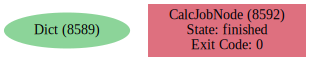

In [3]:
graph = Graph()
graph.add_node(dict1_uuid)
graph.add_node(calc1_uuid)
graph.graphviz

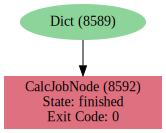

In [4]:
graph.add_edge(
    dict1_uuid, calc1_uuid,
    link_pair=LinkPair(LinkType.INPUT_CALC, "input1"))
graph.graphviz

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


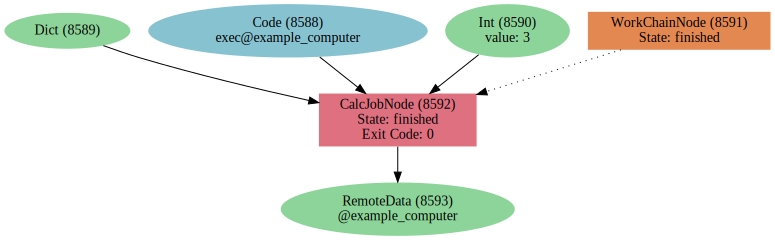

In [5]:
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

The {py:class}`~aiida.tools.visualization.graph.Graph` can also be initialized with global style attributes,
as outlined in the [graphviz attributes table](https://www.graphviz.org/doc/info/attrs.html).

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


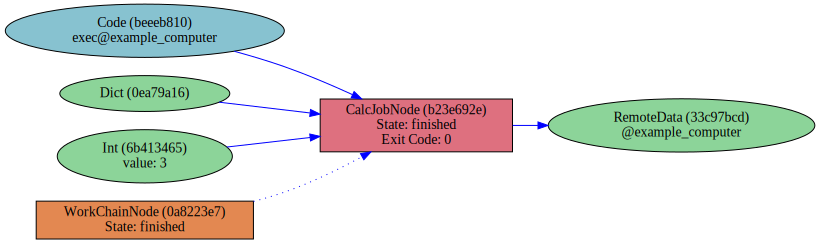

In [6]:
graph = Graph(node_id_type="uuid",
              global_node_style={"penwidth": 1},
              global_edge_style={"color": "blue"},
              graph_attr={"rankdir": "LR"})
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

Additionally functions can be parsed to the {py:class}`~aiida.tools.visualization.graph.Graph` initializer, to specify exactly how each node will be represented. For example, the {py:func}`~aiida.tools.visualization.graph.pstate_node_styles` function colors process nodes by their process state.

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


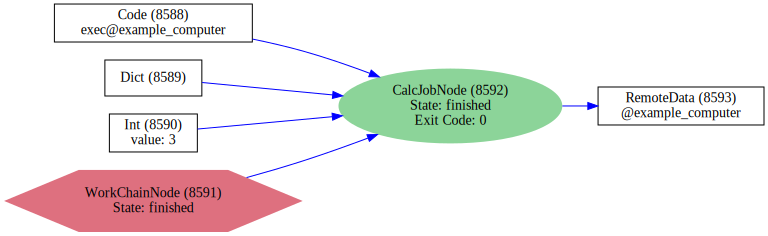

In [7]:
def link_style(link_pair, **kwargs):
    return {"color": "blue"}

graph = Graph(node_style_fn=pstate_node_styles,
              link_style_fn=link_style,
              graph_attr={"rankdir": "LR"})
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

Edges can be annotated by one or both of their edge label and link type.

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


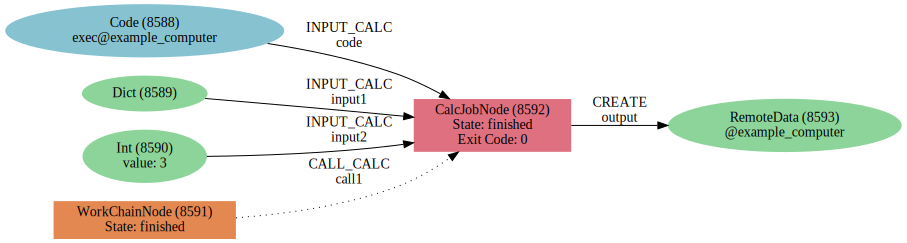

In [8]:
graph = Graph(graph_attr={"rankdir": "LR"})
graph.add_incoming(calc1_uuid,
                   annotate_links="both")
graph.add_outgoing(calc1_uuid,
                   annotate_links="both")
graph.graphviz

The {py:meth}`~aiida.tools.visualization.graph.Graph.recurse_descendants` and {py:meth}`~aiida.tools.visualization.graph.Graph.recurse_ancestors` methods can be used to construct a full provenance graph.

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


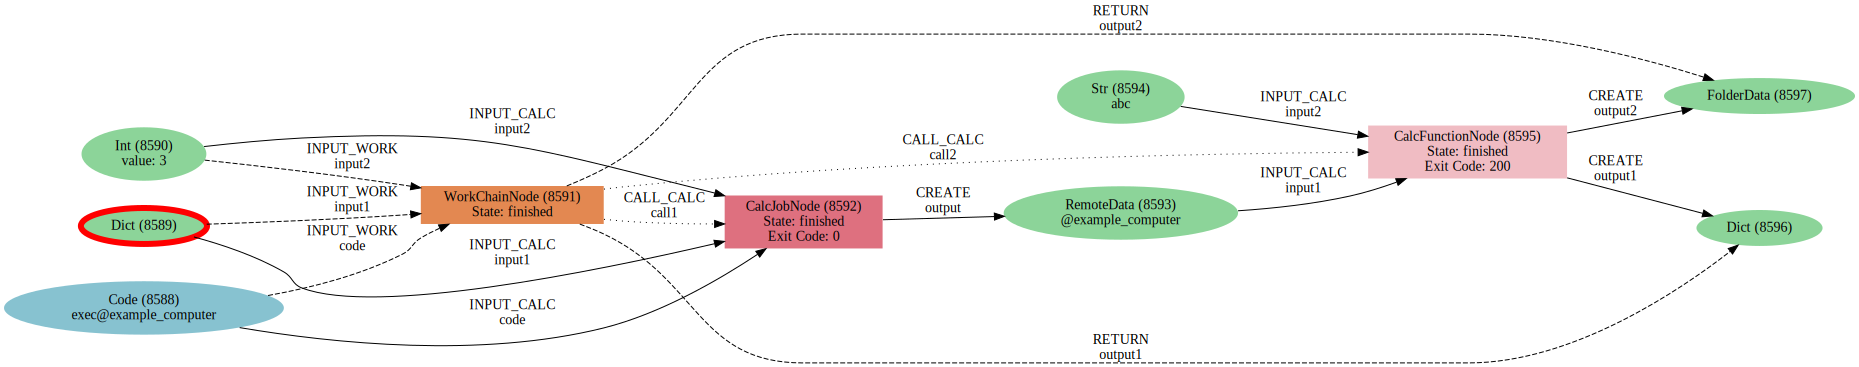

In [9]:
graph = Graph(graph_attr={"rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid,
    origin_style=None,
    include_process_inputs=True,
    annotate_links="both"
)
graph.graphviz

The link types can also be filtered, to view only the 'data' or 'logical' provenance.

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


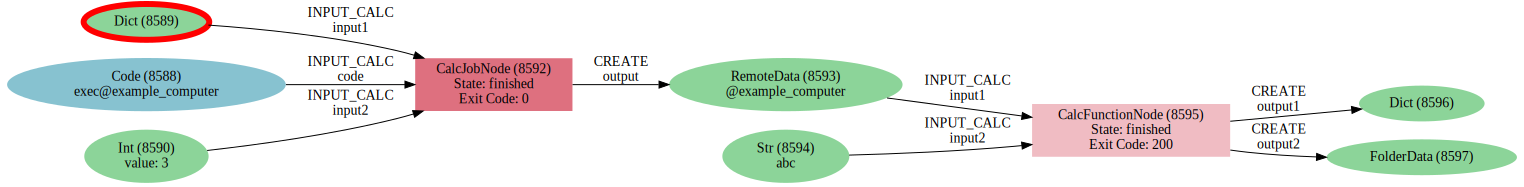

In [10]:
graph = Graph(graph_attr={"rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid,
    origin_style=None,
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_calc", "create")
)
graph.graphviz

/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:598: AiidaDeprecationWarning: `Code.get_execname` method is deprecated, use `get_executable` instead. (this will be removed in v3)
  warn_deprecation('`Code.get_execname` method is deprecated, use `get_executable` instead.', version=3)
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:569: AiidaDeprecationWarning: `Code.is_local` method is deprecated, use a `PortableCode` instance and check the type. (this will be removed in v3)
  warn_deprecation(
/home/docs/checkouts/readthedocs.org/user_builds/aiida-core/envs/latest/lib/python3.11/site-packages/aiida/orm/nodes/data/code/legacy.py:520: AiidaDeprecationWarning: `Code.get_remote_exec_path` method is deprecated, use `InstalledCode.filepath_executable` instead. (this will be removed in v3)
  warn_deprecation(


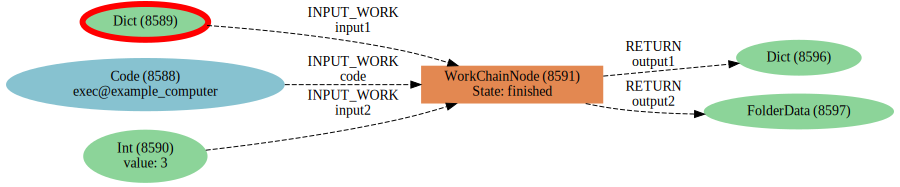

In [11]:
graph = Graph(graph_attr={"rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid,
    origin_style=None,
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_work", "return")
)
graph.graphviz

If you wish to highlight specific node classes,
then the `highlight_classes` option can be used
to only color specified nodes:

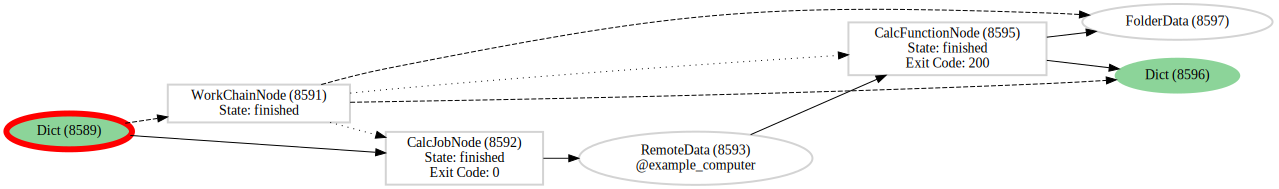

In [12]:
graph = Graph(graph_attr={"rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid,
    highlight_classes=['Dict']
)
graph.graphviz